In [3]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from tabulate import tabulate

In [4]:
#import dataset
data_ev = pd.read_csv('https://data.wa.gov/api/views/3d5d-sdqb/rows.csv')
data_ev.drop(data_ev.loc[data_ev['Vehicle Primary Use']== "Truck"].index, inplace=True)

In [5]:
#drop variabel yang tidak digunakan
data_ev = data_ev.drop(["Vehicle Primary Use", "Battery Electric Vehicles (BEVs)", "Plug-In Hybrid Electric Vehicles (PHEVs)"],axis=1)

In [6]:
#slicing variable date
data_ev["Year"] = data_ev ["Date"].astype(str).str[-4:]
data_ev['Month'] = data_ev['Date'].astype(str).str[:-7]
data_ev = data_ev.drop(["Date"], axis = 1)
data_ev.head()

,County,State,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year,Month
0,St. Mary's,MD,1,215,216,0.46,2020,November
1,Sedgwick,KS,2,89,91,2.20,2021,February
2,New Haven,CT,1,53,54,1.85,2017,November
4,Adams,WA,6,12283,12289,0.05,2017,October
6,Spartanburg,SC,1,45,46,2.17,2020,February


In [7]:
#Merubah bulan menjadi angka
d = {'January ':'01', 'February ':'02', 'March ':'03', 'April ':'04', 'May ':'05', 'June ': '06', 'July ': '07', 'August ': '08', 'September ': '09', 'October ':'10', 'November ':'11', 'December ': '12'}
data_ev['Month'] = data_ev['Month'].map(d)


In [8]:
#Concat column year and month
data_ev["YearMonth"] = data_ev['Year'] + data_ev['Month']

In [9]:
#drop variabel
data_ev = data_ev.drop(["Year", 'Month'], axis = 1)

In [10]:
#merubah data type supaya bisa diurutkan
data_ev['YearMonth'] = data_ev['YearMonth'].astype(int)
data_ev2 = data_ev.sort_values('YearMonth')

In [11]:
#mengambil data state Washington
data_ev2 = data_ev2.loc[data_ev2['State'] == 'WA']
data_ev2

,County,State,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,YearMonth
3663,Chelan,WA,82,51898,51980,0.16,201701
7881,Thurston,WA,635,184964,185599,0.34,201701
14835,Garfield,WA,0,1285,1285,0.00,201701
802,Adams,WA,2,12175,12177,0.02,201701
12995,Clallam,WA,137,48005,48142,0.28,201701
...,...,...,...,...,...,...,...
10338,Benton,WA,1726,131666,133392,1.29,202307
14693,Franklin,WA,456,60118,60574,0.75,202307
8636,Chelan,WA,806,52924,53730,1.50,202307
14557,Whatcom,WA,3413,144372,147785,2.31,202307


In [12]:
#Sort column county dan yearmonth agar berurutan
data_ev3 = data_ev2.sort_values(['County', 'YearMonth'])
data_ev3 = data_ev3.reset_index(drop=True)
data_ev3['YearMonth'] = data_ev3['YearMonth'].astype(int)

In [13]:
#mencari deskripsi dari data yang sudah di cleaning
column_name=[]
for j in data_ev3.columns:
  if j!='County' and j!='State':
    column_name.append(j)
# column_name

for i in column_name:
  print(i.upper())
  print(tabulate(data_ev3.groupby('County')[i].describe(), headers=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']))
  print('\n')

ELECTRIC VEHICLE (EV) TOTAL
                count         mean          std    min      25%    50%      75%    max
------------  -------  -----------  -----------  -----  -------  -----  -------  -----
Adams              79     17.7089      10.2559       2     10       14     28.5     37
Asotin             79     28.2658      13.6576       7     19       28     38.5     58
Benton             79    768.671      414.74       258    394      669   1072     1726
Chelan             79    350.81       210.279       82    172.5    304    517.5    806
Clallam            79    427.342      208.834      137    247      385    616      852
Clark              79   3573.16      2031.5       1099   1853.5   3048   4967.5   8285
Columbia           79      5.82278      2.71161      1      4        6      8       12
Cowlitz            79    300.81       175.556       95    145.5    251    430.5    699
Douglas            79    127.253       60.201       48     78      109    165.5    278
Ferry          

In [ ]:
#mengganti outlier di Variabel dengan mean dari column tersebut
Q1 = np.percentile(data_ev3['Electric Vehicle (EV) Total'], 25, method='midpoint')
Q3 = np.percentile(data_ev3['Electric Vehicle (EV) Total'], 75, method='midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5*IQR

data_ev3['Electric Vehicle Total'] = data_ev3['Electric Vehicle (EV) Total'].apply(lambda x: x if lower <= x <= upper else data_ev3['Electric Vehicle (EV) Total'].mean())

In [ ]:
#mengecek outlier data kembali
Q1 = np.percentile(data_ev3['Electric Vehicle Total'], 25, method='midpoint')
Q3 = np.percentile(data_ev3['Electric Vehicle Total'], 75, method='midpoint')

IQR = Q3 - Q1
print('IQR:', IQR)

upper = Q3 + 1.5 * IQR
upper_array = np.array(data_ev3['Electric Vehicle Total']>=upper)
upper_array = np.where(data_ev3['Electric Vehicle Total']>=upper)[0]
print("Upper Bound:",upper)
print('Outlier above upper bound:', upper_array.sum())
print('Upper Array:',upper_array)
lower = Q1 - 1.5*IQR
lower_array = np.array(data_ev3['Electric Vehicle Total']<=lower)
print('Lower Bound:', lower)
print('Outlier below lower bound:', lower_array.sum())
lower_array = np.where(data_ev3['Electric Vehicle Total']<=lower)[0]
print('Lower Array:',lower_array)

IQR: 630.0
Upper Bound: 1620.0
Outlier above upper bound: 854075
Upper Array: [ 233  234  235  236  411  412  413  414  415  416  417  418  419  420
  421  422  423  424  425  426  427  428  429  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  470  471  472  473 1264 1265 1266
 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280
 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294
 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308
 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322
 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336
 1337 1338 1339 1340 1341 1342 1371 1372 1373 1374 1375 1376 1377 1378
 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392
 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404 1405 1406

In [ ]:
Q1 = np.percentile(data_ev3['Non-Electric Vehicle Total'], 25, method='midpoint')
Q3 = np.percentile(data_ev3['Non-Electric Vehicle Total'], 75, method='midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5*IQR

data_ev3['Non Electric Vehicle Total'] = data_ev3['Non-Electric Vehicle Total'].apply(lambda x: x if lower <= x <= upper else data_ev3['Non-Electric Vehicle Total'].mean())

In [ ]:
Q1 = np.percentile(data_ev3['Non Electric Vehicle Total'], 25, method='midpoint')
Q3 = np.percentile(data_ev3['Non Electric Vehicle Total'], 75, method='midpoint')

IQR = Q3 - Q1
print('IQR:', IQR)

upper = Q3 + 1.5 * IQR
upper_array = np.array(data_ev3['Non Electric Vehicle Total']>=upper)
print("Upper Bound:",upper)
print('Outlier above upper bound:', upper_array.sum())
upper_array = np.where(data_ev3['Non Electric Vehicle Total']>=upper)[0]
print('Upper Array:',upper_array)
lower = Q1 - 1.5*IQR
lower_array = np.array(data_ev3['Non Electric Vehicle Total']<=lower)
print('Lower Bound:', lower)
print('Outlier below lower bound:', lower_array.sum())
lower_array = np.where(data_ev3['Non Electric Vehicle Total']<=lower)[0]
print('Lower Array:',lower_array)

IQR: 108704.46738072054
Upper Bound: 285975.16845180135
Outlier above upper bound: 46
Upper Array: [ 395  396  397  398  399  400  401  402  403  404  405  406  407  408
  409  410  411  412  473 2449 2450 2451 2452 2453 2454 2455 2456 2457
 2458 2459 2460 2461 2462 2463 2464 2465 2466 2467 2468 2469 2470 2471
 2472 2473 2474 2475]
Lower Bound: -148842.7010710808
Outlier below lower bound: 0
Lower Array: []


In [ ]:
Q1 = np.percentile(data_ev3['Total Vehicles'], 25, method='midpoint')
Q3 = np.percentile(data_ev3['Total Vehicles'], 75, method='midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5*IQR

data_ev3['Total Vehicles2'] = data_ev3['Total Vehicles'].apply(lambda x: x if lower <= x <= upper else data_ev3['Total Vehicles'].mean())

In [ ]:
Q1 = np.percentile(data_ev3['Total Vehicles2'], 25, method='midpoint')
Q3 = np.percentile(data_ev3['Total Vehicles2'], 75, method='midpoint')

IQR = Q3 - Q1
print('IQR:', IQR)

upper = Q3 + 1.5 * IQR
upper_array = np.array(data_ev3['Total Vehicles2']>=upper)
print("Upper Bound:",upper)
print('Outlier above upper bound:', upper_array.sum())
upper_array = np.where(data_ev3['Total Vehicles2']>=upper)[0]
print('Upper Array:',upper_array)
lower = Q1 - 1.5*IQR
lower_array = np.array(data_ev3['Total Vehicles2']<=lower)
print('Lower Bound:', lower)
print('Outlier below lower bound:', lower_array.sum())

lower_array = np.where(data_ev3['Total Vehicles2']<=lower)[0]
print('Lower Array:',lower_array)

IQR: 109820.48490749756
Upper Bound: 289277.2122687439
Outlier above upper bound: 44
Upper Array: [ 395  396  397  398  399  400  401  402  403  404  405  406  407  408
  409  410  411 2449 2450 2451 2452 2453 2454 2455 2456 2457 2458 2459
 2460 2461 2462 2463 2464 2465 2466 2467 2468 2469 2470 2471 2472 2473
 2474 2475]
Lower Bound: -150004.72736124636
Outlier below lower bound: 0
Lower Array: []


In [ ]:
Q1 = np.percentile(data_ev3['Percent Electric Vehicles'], 25, method='midpoint')
Q3 = np.percentile(data_ev3['Percent Electric Vehicles'], 75, method='midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5*IQR

data_ev3['Percent Electric Vehicles2'] = data_ev3['Percent Electric Vehicles'].apply(lambda x: x if lower <= x <= upper else data_ev3['Percent Electric Vehicles'].mean())

In [ ]:
Q1 = np.percentile(data_ev3['Percent Electric Vehicles2'], 25, method='midpoint')
Q3 = np.percentile(data_ev3['Percent Electric Vehicles2'], 75, method='midpoint')

IQR = Q3 - Q1
print('IQR:', IQR)

upper = Q3 + 1.5 * IQR
upper_array = np.array(data_ev3['Percent Electric Vehicles2']>=upper)
print("Upper Bound:",upper)
print('Outlier above upper bound:', upper_array.sum())
upper_array = np.where(data_ev3['Percent Electric Vehicles2']>=upper)[0]
print('Upper Array:',upper_array)

lower = Q1 - 1.5*IQR
lower_array = np.array(data_ev3['Percent Electric Vehicles2']<=lower)
print('Lower Bound:', lower)
print('Outlier below lower bound:', lower_array.sum())

upper_array = np.where(data_ev3['Percent Electric Vehicles2']>=upper)[0]
lower_array = np.where(data_ev3['Percent Electric Vehicles2']<=lower)[0]
print('Lower Array:',lower_array)

IQR: 0.51
Upper Bound: 1.495
Outlier above upper bound: 128
Upper Array: [ 315  388  389  390  391  392  393  394  453  454  455  456  457  458
  459  460  461 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171
 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1285 1286 1287 1288
 1289 1290 1291 1292 1293 1294 1295 1397 1398 1399 1400 1401 1402 1403
 1404 1405 1406 1407 1408 1499 1500 2124 2125 2126 2127 2128 2129 2130
 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2285 2286 2287 2288
 2289 2290 2358 2359 2360 2361 2362 2363 2364 2365 2366 2424 2425 2426
 2427 2428 2429 2430 2431 2432 2433 2669 2670 2671 2672 2673 2674 2675
 2676 2677 2678 2903 2904 2905 2906 2907 2908 2909 2910 2911 2912 2913
 2914 2915]
Lower Bound: -0.545
Outlier below lower bound: 0
Lower Array: []


In [ ]:
#memeriksa apakah ada null values
data_ev3.isnull().sum()

County                         0
State                          0
Electric Vehicle (EV) Total    0
Non-Electric Vehicle Total     0
Total Vehicles                 0
Percent Electric Vehicles      0
YearMonth                      0
Electric Vehicle Total         0
Non Electric Vehicle Total     0
Total Vehicles2                0
Percent Electric Vehicles2     0
dtype: int64

In [ ]:
#melakukan grouping untuk mengetahui jumlah dari suatu variabel dalam 1 bulan
groups = data_ev3.groupby(['YearMonth']).agg({
    'Electric Vehicle Total': 'sum',
    'Non Electric Vehicle Total': 'sum',
    'Total Vehicles2': 'sum',
})

groups['Percent Electric Vehicles'] = (groups['Electric Vehicle Total'] / groups['Total Vehicles2']) * 100
groups = groups.reset_index()

groups

,YearMonth,Electric Vehicle Total,Non Electric Vehicle Total,Total Vehicles2,Percent Electric Vehicles
0,201701,10261.035054,2.618835e+06,2.629151e+06,0.390279
1,201702,10463.052580,2.615056e+06,2.625519e+06,0.398514
2,201703,10665.052580,2.619019e+06,2.629684e+06,0.405564
3,201704,10878.052580,2.621397e+06,2.632275e+06,0.413257
4,201705,11073.052580,2.625851e+06,2.636924e+06,0.419923
...,...,...,...,...,...
74,202303,26366.140214,2.337093e+06,2.369833e+06,1.112574
75,202304,26710.157741,2.332132e+06,2.365530e+06,1.129140
76,202305,27026.157741,2.326377e+06,2.360415e+06,1.144975
77,202306,27312.157741,2.316445e+06,2.351087e+06,1.161682


In [ ]:
#mengganti YearMonth menjadi angka 1 hingga 79 agar mudah dipahami di grafik
for i in range(1,80):
    groups.loc[i-1, "YearMonth"] = i

groups["YearMonth"] = groups["YearMonth"].astype("int64")

groups

,YearMonth,Electric Vehicle Total,Non Electric Vehicle Total,Total Vehicles2,Percent Electric Vehicles
0,1,10261.035054,2.618835e+06,2.629151e+06,0.390279
1,2,10463.052580,2.615056e+06,2.625519e+06,0.398514
2,3,10665.052580,2.619019e+06,2.629684e+06,0.405564
3,4,10878.052580,2.621397e+06,2.632275e+06,0.413257
4,5,11073.052580,2.625851e+06,2.636924e+06,0.419923
...,...,...,...,...,...
74,75,26366.140214,2.337093e+06,2.369833e+06,1.112574
75,76,26710.157741,2.332132e+06,2.365530e+06,1.129140
76,77,27026.157741,2.326377e+06,2.360415e+06,1.144975
77,78,27312.157741,2.316445e+06,2.351087e+06,1.161682


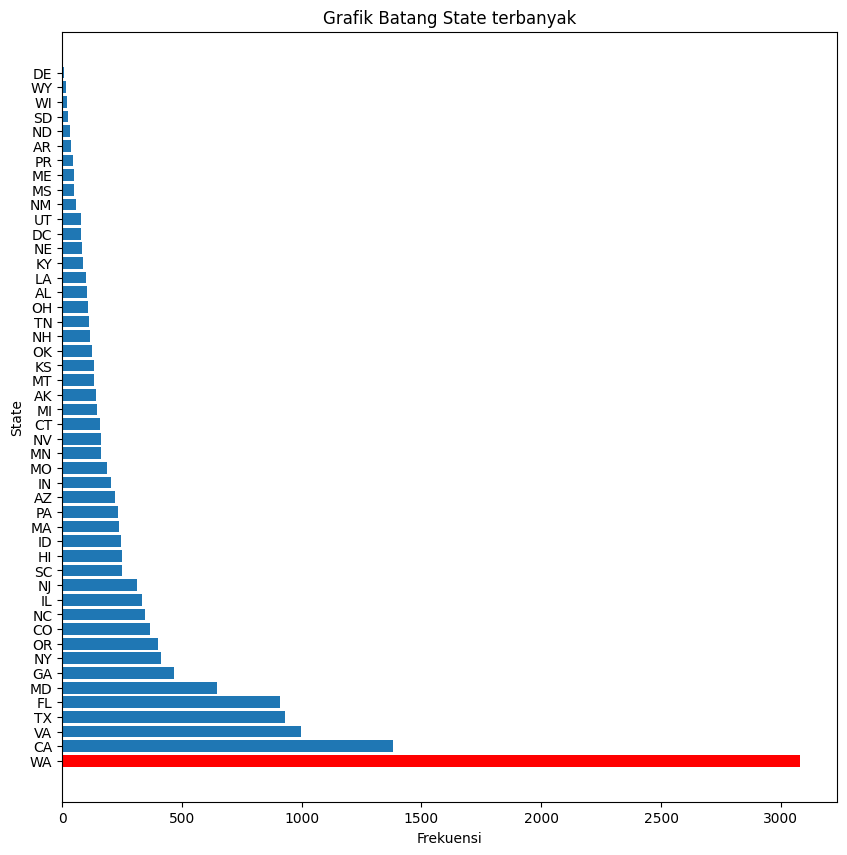

In [ ]:
#grafik batang untuk membuktikkan Washington merupakan kota yang paling banyak muncul di data
most_common_value = data_ev['State'].mode()[0]
value_counts = data_ev['State'].value_counts()

plt.figure(figsize=(10, 10))
plt.barh(value_counts.index, value_counts.values)
plt.barh(most_common_value, value_counts[most_common_value], color='red')


plt.xlabel('Frekuensi')
plt.ylabel('State')
plt.title('Grafik Batang State terbanyak')
plt.show()

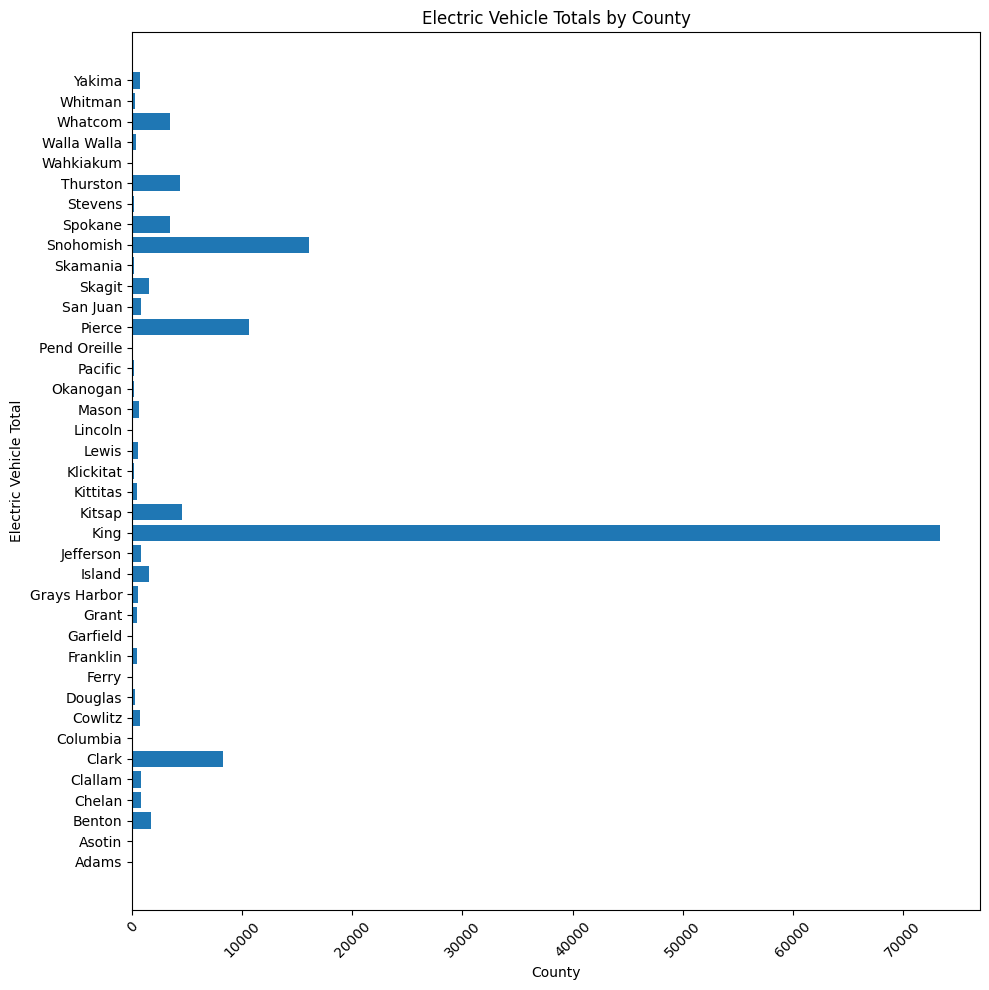

In [ ]:
#Mencari county dengan pengguna EV terbanyak di Washington
plt.figure(figsize=(10, 10))

plt.barh(data_ev3["County"], data_ev3["Electric Vehicle (EV) Total"])
plt.xlabel("County")
plt.ylabel("Electric Vehicle Total")
plt.title("Electric Vehicle Totals by County")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

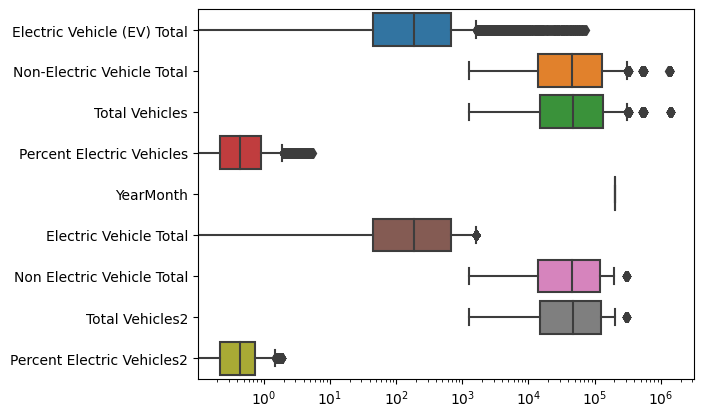

In [ ]:
#Mencari outlier data
sns.boxplot(data=data_ev3, orient='h')
plt.xscale('log')

<Axes: >

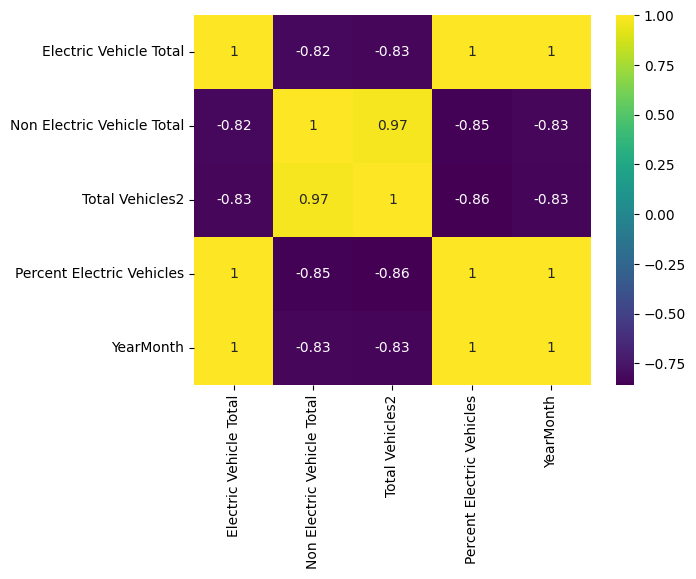

In [ ]:
#mencari korelasi
sns.heatmap(groups[["Electric Vehicle Total","Non Electric Vehicle Total","Total Vehicles2","Percent Electric Vehicles","YearMonth"]].corr(), annot=True,  cmap="viridis")

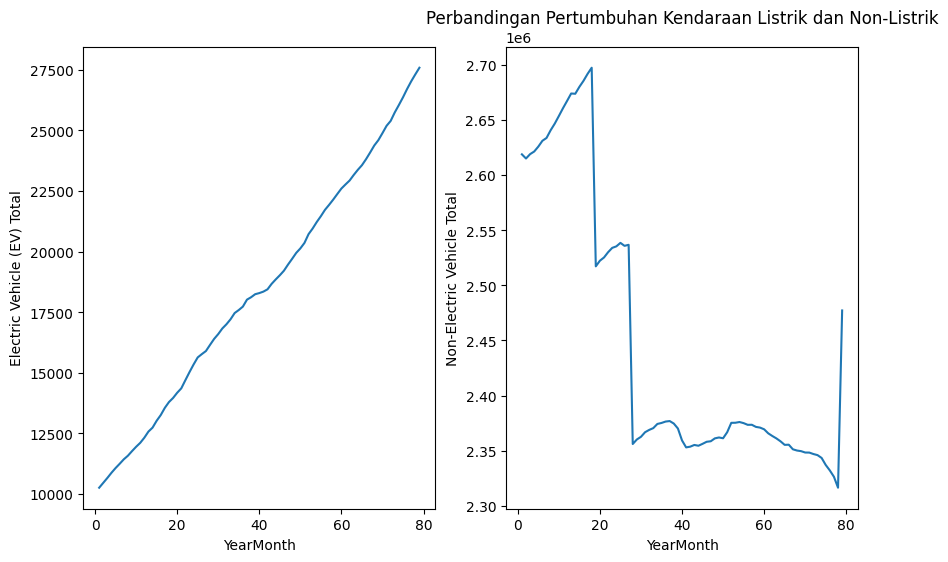

In [ ]:
#mencari perbandingan pertumbuhan kendaraan listrik dan non listrik
plt.figure(figsize=(10,6))
#plot 1:
plt.subplot(1, 2, 1)
plt.plot(groups['YearMonth'],groups['Electric Vehicle Total'])
plt.xlabel("YearMonth")
plt.ylabel("Electric Vehicle (EV) Total")
#plot 2:
plt.subplot(1, 2, 2)
plt.plot(groups['YearMonth'],groups['Non Electric Vehicle Total'])
plt.xlabel("YearMonth")
plt.ylabel("Non-Electric Vehicle Total")
plt.title("Perbandingan Pertumbuhan Kendaraan Listrik dan Non-Listrik")
plt.show()

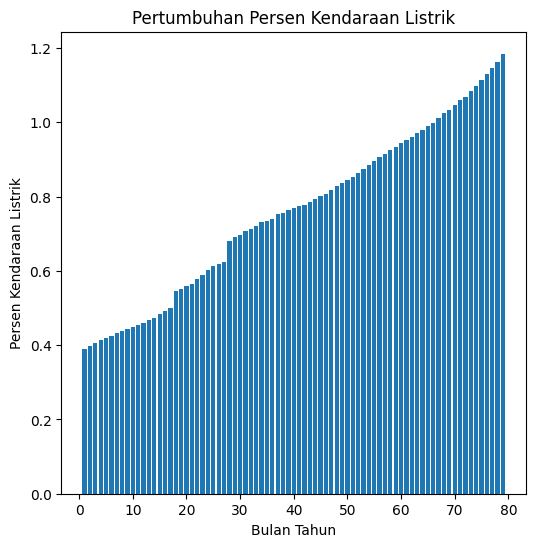

In [ ]:
#mencari pertumbuhan pengguna kendaraan listrik
plt.figure(figsize=(6, 6))
plt.bar(groups['YearMonth'], groups['Percent Electric Vehicles'])

plt.xlabel('Bulan Tahun')
plt.ylabel('Persen Kendaraan Listrik')
plt.title('Pertumbuhan Persen Kendaraan Listrik')
plt.show()

##Multiple Linear Regression

In [ ]:
X = groups.drop(['Percent Electric Vehicles','Non Electric Vehicle Total',	'Total Vehicles2',"Electric Vehicle Total"], axis = 1)
y = groups['Percent Electric Vehicles']

In [ ]:
#split data menjadi training dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#melihat korelasi linear antara data asli dan data prediksi
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Menentukan koefisien c
c = lr.intercept_
c

0.36156669711585343

In [ ]:
#Menentukan koefisien m
m = lr.coef_
m

array([0.00989994])

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([0.40116647, 0.58926537, 0.44076624, 0.62886514, 0.78726422,
       0.74766445, 0.77736427, 1.14366214, 0.90606353, 0.53976566,
       0.95556324, 0.97536312, 0.43086629, 0.91596347, 1.08426249,
       0.41106641, 0.69816474, 0.88626364, 0.64866502, 0.48036601,
       0.86646376, 0.59916531, 0.47046606, 0.67836485, 0.79716416,
       0.96546318, 0.38136658, 0.68826479, 1.02486283, 0.51006583,
       0.89616358, 0.55956554, 0.65856497, 0.60906526, 0.71796462,
       0.5496656 , 0.37146664, 1.1337622 , 0.51996577, 0.42096635,
       1.04466272, 0.52986572, 0.8763637 , 0.56946549, 1.09416243,
       0.45066618, 0.50016589, 0.6189652 , 0.73776451, 0.82686399,
       0.75756439, 1.01496289, 0.94566329, 0.49026595, 1.0644626 ,
       0.72786456, 0.57936543, 0.46056612, 1.11396231, 1.03476278,
       1.00506295, 0.83676393, 0.8070641 ])

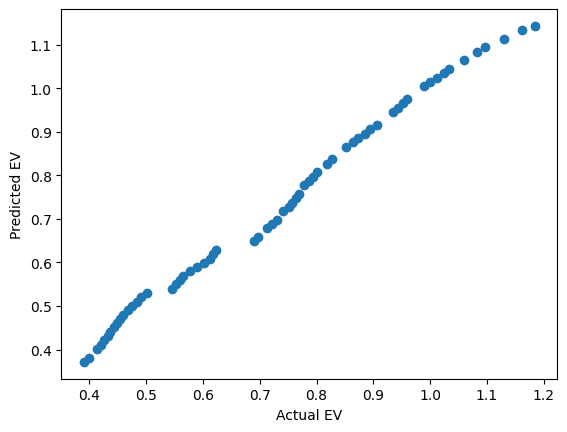

In [ ]:
#run training data
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual EV')
plt.ylabel("Predicted EV")
plt.show()

In [ ]:
#melihat r2 score training data
r2_score(y_train, y_pred_train)

0.9940196566594295

In [ ]:
y_pred_test = lr.predict(X_test)

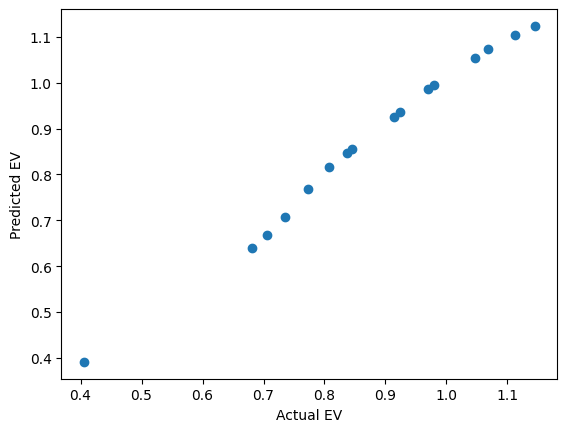

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual EV')
plt.ylabel("Predicted EV")
plt.show()

In [ ]:
#melihat r2 score test data
r2_score(y_test, y_pred_test)

0.9892974376889521

## Build Model Linear Regression

In [ ]:
#import feature dan target
X = groups["YearMonth"]
y = groups['Percent Electric Vehicles']

In [ ]:
#split data menjadi training dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

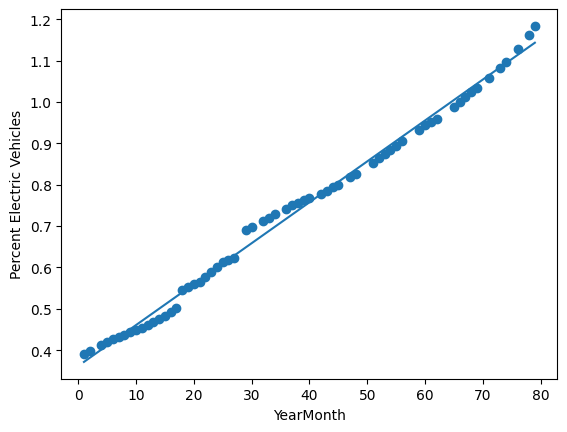

In [ ]:
#run training data
model = np.poly1d(np.polyfit(X_train, y_train, 1))

line = np.linspace(1, 79, 100)

plt.scatter(X_train, y_train)
plt.plot(line, model(line))
plt.xlabel("YearMonth")
plt.ylabel("Percent Electric Vehicles")
plt.show()

In [ ]:
#melihat r2 score data training
print(r2_score(y_train, model(X_train)))

0.9940196566594295


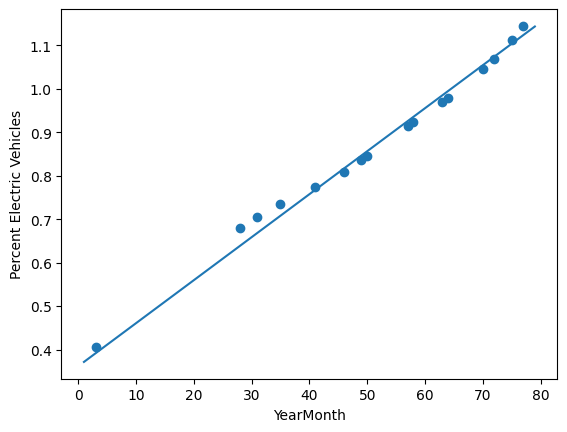

In [ ]:
#run test data
line = np.linspace(1, 79, 100)
plt.scatter(X_test, y_test)
plt.plot(line, model(line))
plt.xlabel("YearMonth")
plt.ylabel("Percent Electric Vehicles")
plt.show()

In [ ]:
#melihat r2 score test data
print(r2_score(y_test, model(X_test)))

0.9892974376889521


In [ ]:
#Melihat nilai persen kendaraan listrik di tahun 2030 bulan januari dan desember
clean_cars_2030_jan = model(157)
clean_cars_2030_des = model(168)
print(f"Persen kendaraan listrik Januari 2030: {clean_cars_2030_jan}")
print(f"Persen kendaraan listrik Desember 2030: {clean_cars_2030_des}")

Persen kendaraan listrik Januari 2030: 1.9158576428317253
Persen kendaraan listrik Desember 2030: 2.02475700845513


## Build Model Polinomial Regression

In [ ]:
#import feature dan target
X = groups["YearMonth"]
y = groups['Percent Electric Vehicles']

In [ ]:
#split data menjadi training dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

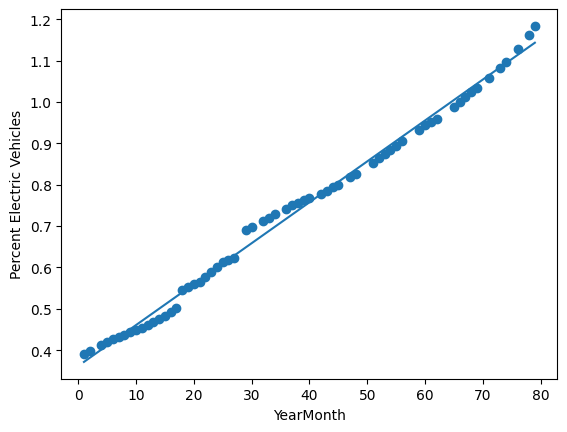

In [ ]:
#run training data
model = np.poly1d(np.polyfit(X_train, y_train, 2))

line = np.linspace(1, 79, 100)

plt.scatter(X_train, y_train)
plt.plot(line, model(line))
plt.xlabel("YearMonth")
plt.ylabel("Percent Electric Vehicles")
plt.show()

In [ ]:
#melihat r2 score data training
print(r2_score(y_train, model(X_train)))

0.9940196566594295


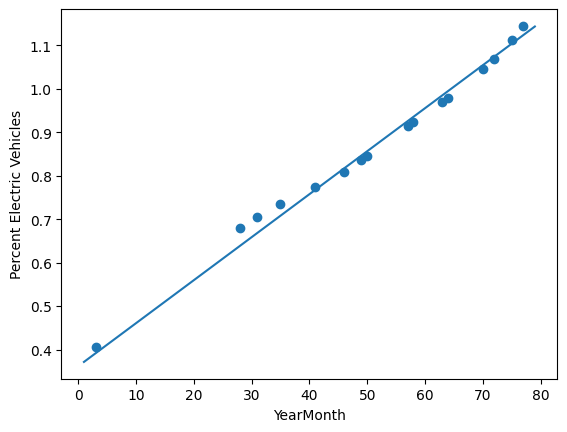

In [ ]:
#run test data
line = np.linspace(1, 79, 100)
plt.scatter(X_test, y_test)
plt.plot(line, model(line))
plt.xlabel("YearMonth")
plt.ylabel("Percent Electric Vehicles")
plt.show()

In [ ]:
#melihat r2 score test data
print(r2_score(y_test, model(X_test)))

0.9892974376889521


In [ ]:
#Melihat nilai persen kendaraan listrik di tahun 2030 bulan januari dan desember
clean_cars_2030_jan = model(157)
clean_cars_2030_des = model(168)
print(f"Persen kendaraan listrik Januari 2030: {clean_cars_2030_jan}")
print(f"Persen kendaraan listrik Desember 2030: {clean_cars_2030_des}")

Persen kendaraan listrik Januari 2030: 1.9158576428317253
Persen kendaraan listrik Desember 2030: 2.02475700845513
